In [1]:
import re
# from gensim.test.utils import datapath
from matplotlib import font_manager, rc
from gensim import corpora, models
from gensim.models import LdaModel
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
# from tqdm.notebook import tqdm
# from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\H2HDRM.TTF").get_name()
rc("font",family=font_name)

In [3]:
data = pd.read_csv(r"C:\Users\hun98\Desktop\Park_Hun\학교\6.22학년도 2학기\HTM 데이터마이닝\data_mining\data_mining\result_version1\henna\henna_tokens.csv")
data.dropna(subset=['0'],inplace=True)
tokens=data.values.tolist()
fill_tokens=[]
for token in tokens:
    token=[word for word in token if pd.isnull(word) == False ]
    fill_tokens.append(token)

In [4]:
dictionary = corpora.Dictionary(fill_tokens)
print('number of initial unique words in documents:',len(dictionary))

number of initial unique words in documents: 896


In [5]:
lda_corpus=[dictionary.doc2bow(text) for text in fill_tokens] #doc2bow는 해당 문서에서 각 단어의 언급 빈도수

In [6]:
def show_coherence(corpus, dictionary, start=1, end=15):
    iter_num=[]
    per_value=[]
    coh_value=[]
    
    for i in range(start, end+1):
        model = LdaModel(corpus = corpus,id2word=dictionary, num_topics=i, random_state=1)
        iter_num.append(i)
        pv=model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm=CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topic:{i},perplexity:{pv:0.3f},coherence:{cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()
    
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

num_topic:1,perplexity:-6.084,coherence:-2.024
num_topic:2,perplexity:-6.263,coherence:-2.520
num_topic:3,perplexity:-6.379,coherence:-2.510
num_topic:4,perplexity:-6.471,coherence:-2.836
num_topic:5,perplexity:-6.549,coherence:-3.366
num_topic:6,perplexity:-6.600,coherence:-3.413
num_topic:7,perplexity:-6.673,coherence:-3.377
num_topic:8,perplexity:-6.723,coherence:-3.752
num_topic:9,perplexity:-6.770,coherence:-3.959
num_topic:10,perplexity:-6.805,coherence:-3.883
num_topic:11,perplexity:-6.859,coherence:-4.086
num_topic:12,perplexity:-6.925,coherence:-4.251
num_topic:13,perplexity:-6.959,coherence:-4.418
num_topic:14,perplexity:-7.014,coherence:-4.670
num_topic:15,perplexity:-7.015,coherence:-4.842


c:\Users\hun98\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


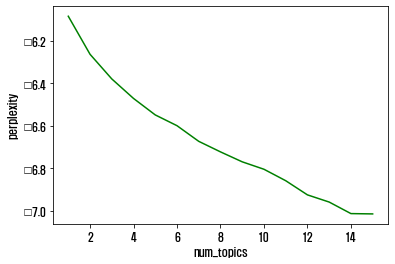

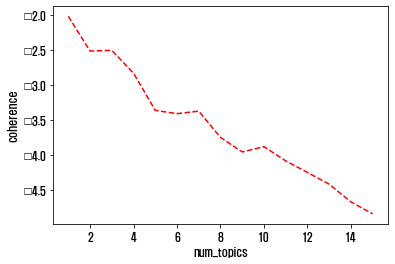

In [7]:
show_coherence(lda_corpus,dictionary)

In [8]:
"""
henna는 coherence를 우선적으로 고려해 토픽의 갯수는 3로 설정함.
lescape는 coherence를 우선적으로 고려해 토픽의 갯수는 5로 설정함.
novotel은 coherence를 우선적으로 고려해 토픽의 갯수는 6로 설정함.

"""
num_topics = 3
passes = 5
%time model = LdaModel(corpus = lda_corpus, id2word=dictionary,\
                      passes=passes, num_topics=num_topics,\
                      random_state=1)

CPU times: total: 2.81 s
Wall time: 3.51 s


In [9]:
model.print_topics(num_words=10)

[(0,
  '0.036*"로봇" + 0.023*"호텔" + 0.017*"위치" + 0.016*"만족" + 0.015*"화장실" + 0.014*"숙소" + 0.014*"냄새" + 0.014*"객실" + 0.013*"방문" + 0.013*"친절"'),
 (1,
  '0.043*"이용" + 0.019*"로봇" + 0.019*"감사" + 0.013*"호텔" + 0.012*"친절" + 0.012*"직원" + 0.010*"숙소" + 0.009*"시설" + 0.008*"남산" + 0.008*"방문"'),
 (2,
  '0.043*"호텔" + 0.030*"친절" + 0.027*"숙박" + 0.027*"청결" + 0.022*"욕조" + 0.019*"가격" + 0.015*"직원" + 0.013*"위치" + 0.012*"방문" + 0.012*"체크인"')]

In [10]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model,lda_corpus,dictionary)
pyLDAvis.save_html(vis,"henna.html")

c:\Users\hun98\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

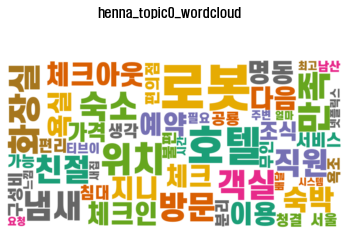

c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

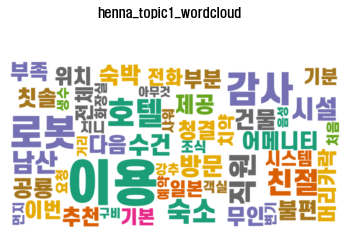

c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\hun98\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

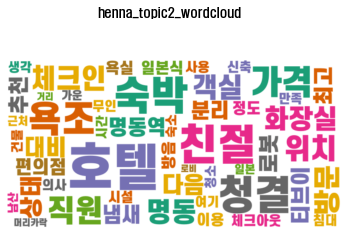

In [12]:
wordcloud = WordCloud(font_path="C:\\Users\\hun98\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream9.otf", background_color='white', colormap='Dark2',
                      max_font_size=115, width=800, height=400, max_words=50)

for i in range(num_topics):
    wordcloud.generate_from_frequencies(dict(model.show_topic(i, 150)))

    plt.figure(facecolor='white')
    plt.axis("off")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.suptitle(f"henna_topic{i}_wordcloud")  # Changed from plt.title
    plt.savefig(f"henna_topic{i}_wordcloud.png")
    plt.show()